<a href="https://colab.research.google.com/github/Yassmine-Yazidi-573/ANN_Digit_recognition/blob/main/Hand_writing_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Using Tensorflow library: **

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train , x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat= to_categorical(y_test, 10)

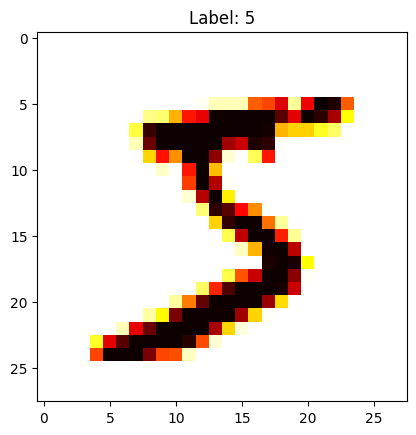

In [13]:
plt.imshow(x_train[0], cmap='hot_r')
plt.title(f"Label: {y_train[0]}")
plt.show()

### **Model Building:**

In [79]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [80]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train_cat,epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8619 - loss: 0.4799 - val_accuracy: 0.9573 - val_loss: 0.1517
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9610 - loss: 0.1352 - val_accuracy: 0.9682 - val_loss: 0.1084
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9748 - loss: 0.0858 - val_accuracy: 0.9691 - val_loss: 0.1013
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9821 - loss: 0.0639 - val_accuracy: 0.9718 - val_loss: 0.0945
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9862 - loss: 0.0474 - val_accuracy: 0.9729 - val_loss: 0.0926


# **Model Evaluation:**

In [16]:
loss, accuracy= model.evaluate(x_test,y_test_cat)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9695 - loss: 0.0935
Test Loss: 0.08018848299980164
Test Accuracy: 0.9739000201225281


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


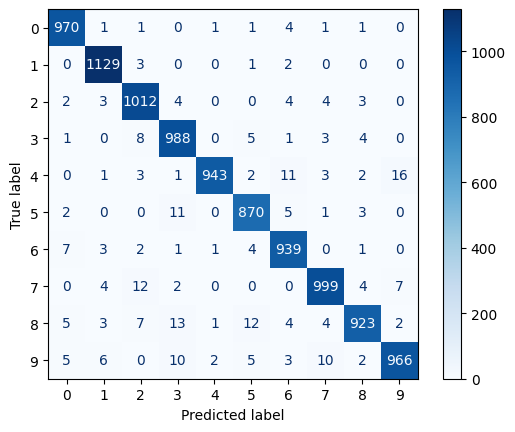

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred= model.predict(x_test)
y_pred= np.argmax(y_pred, axis=1)
cm= confusion_matrix(y_test, y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

### **Visualize misclassifed digits:**

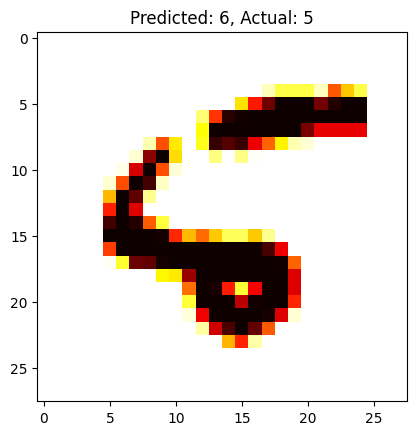

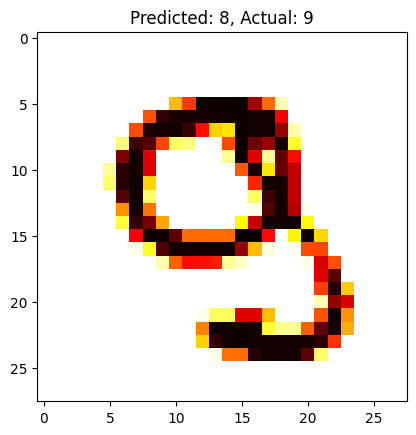

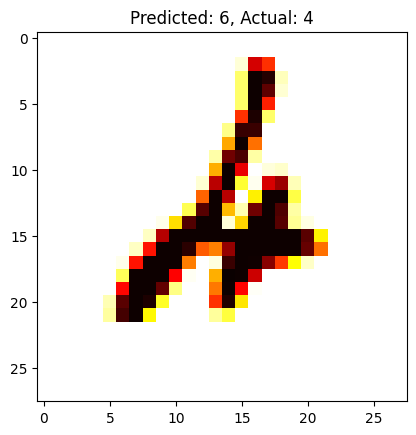

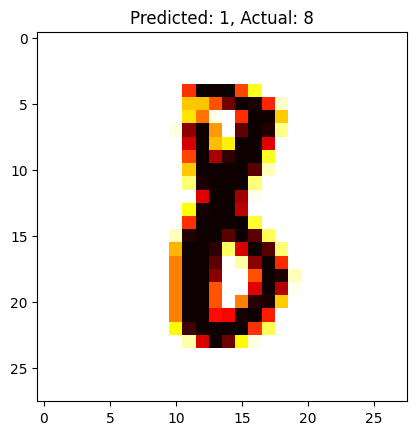

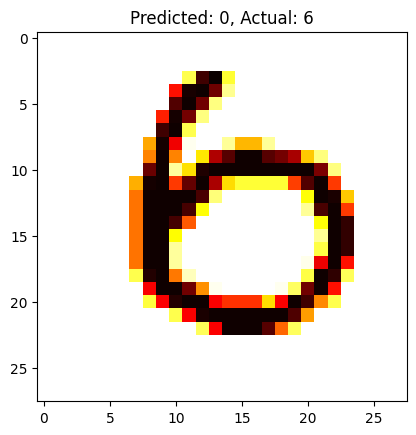

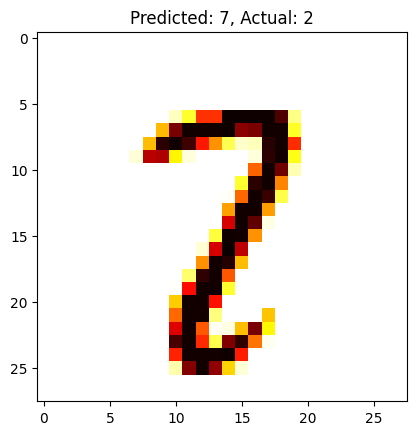

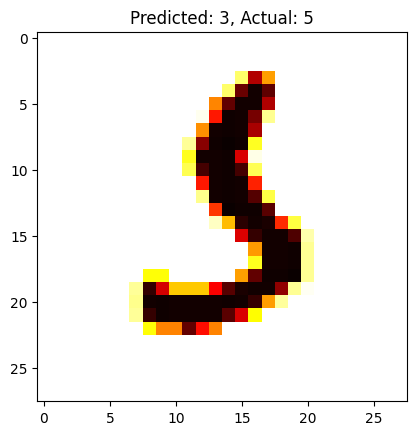

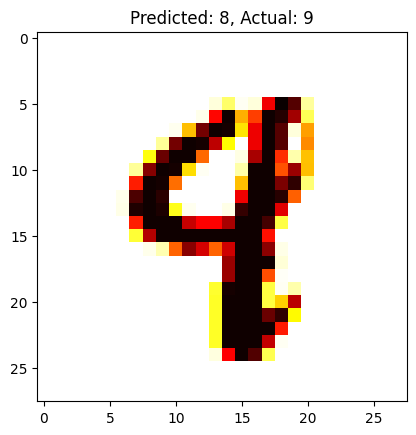

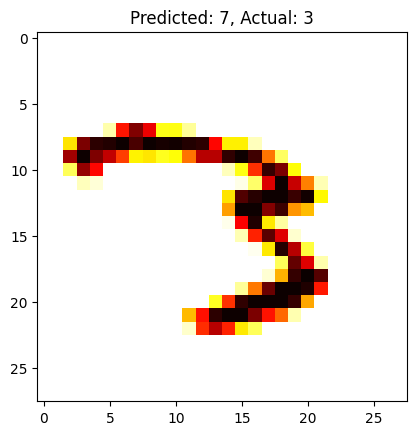

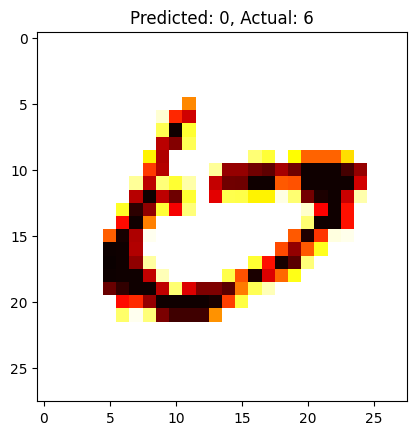

In [21]:
misclassified_indices= np.where(y_pred != y_test)[0]
for i in misclassified_indices[:10]:
    plt.imshow(x_test[i], cmap='hot_r')
    plt.title(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")
    plt.show()

## **Testing a specific digit: My own HandWriting **

In [75]:
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
import cv2

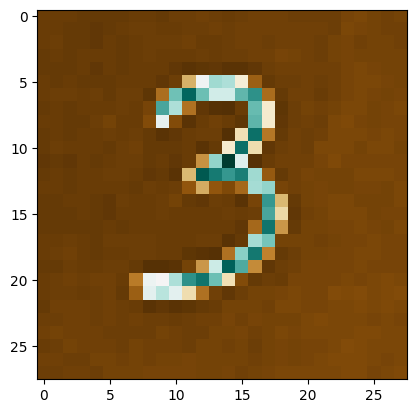

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted Digit: 3


In [77]:
img= Image.open('three_digit.png').convert('L')
img= img.resize((28,28))
img = np.array(img)
img=cv2.bitwise_not(img) # switching the background color
plt.imshow(img, cmap='BrBG')
plt.show()
img_array=img_to_array(img)
img_array= img_array.reshape(1,28,28)/ 255.0
predict_digit=model.predict (img_array)
predicted_digit_label= np.argmax(predict_digit)
print(f'Predicted Digit: {predicted_digit_label}')

**Yay!! right prediction**

## **Testing the model on a digit from the test-data :**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


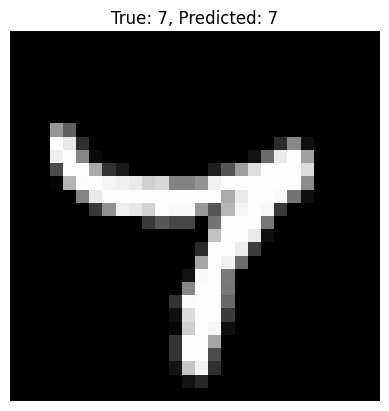

In [70]:
index = 124
image = x_test[index]
true_label = y_test[index]
prediction = model.predict(image.reshape(1, 28, 28))
predicted_label = np.argmax(prediction)
plt.imshow(image, cmap='gray')
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()